In [9]:
import pickle
import numpy as np
import os
import json
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

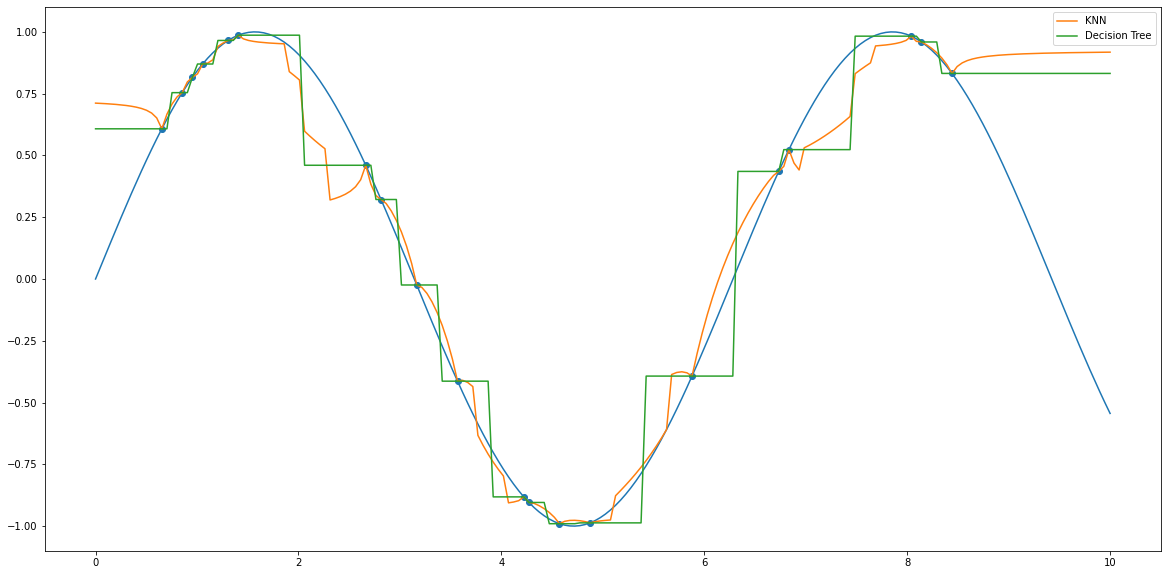

In [24]:
N = 200
X = np.linspace(0, 10, N).reshape(N, 1)
Y = np.sin(X)

Ntrain = 20
idx = np.random.choice(N, Ntrain)
Xtrain = X[idx]
Ytrain = Y[idx]

knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(Xtrain, Ytrain)
Yknn = knn.predict(X)

dt = DecisionTreeRegressor()
dt.fit(Xtrain, Ytrain)
Ydt = dt.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(Xtrain, Ytrain) # show the training points
plt.plot(X, Y) # show the original data
plt.plot(X, Yknn, label='KNN')
plt.plot(X, Ydt, label='Decision Tree')
plt.legend();

In [14]:
! ls

sample_data


In [18]:
with open('knn_model.pkl', 'wb') as f:
    model = pickle.dump(knn, f)

with open('dt_model.pkl', 'wb') as f:
    model = pickle.dump(dt, f)

! ls

dt_model.pkl  knn_model.pkl  sample_data


In [17]:
if os.path.exists('knn_model.pkl'):
    with open('knn_model.pkl', 'rb') as f:
      knn_loaded = pickle.load(f)

if os.path.exists('dt_model.pkl'):
    with open('dt_model.pkl', 'rb') as f:
      dt_loaded = pickle.load(f)

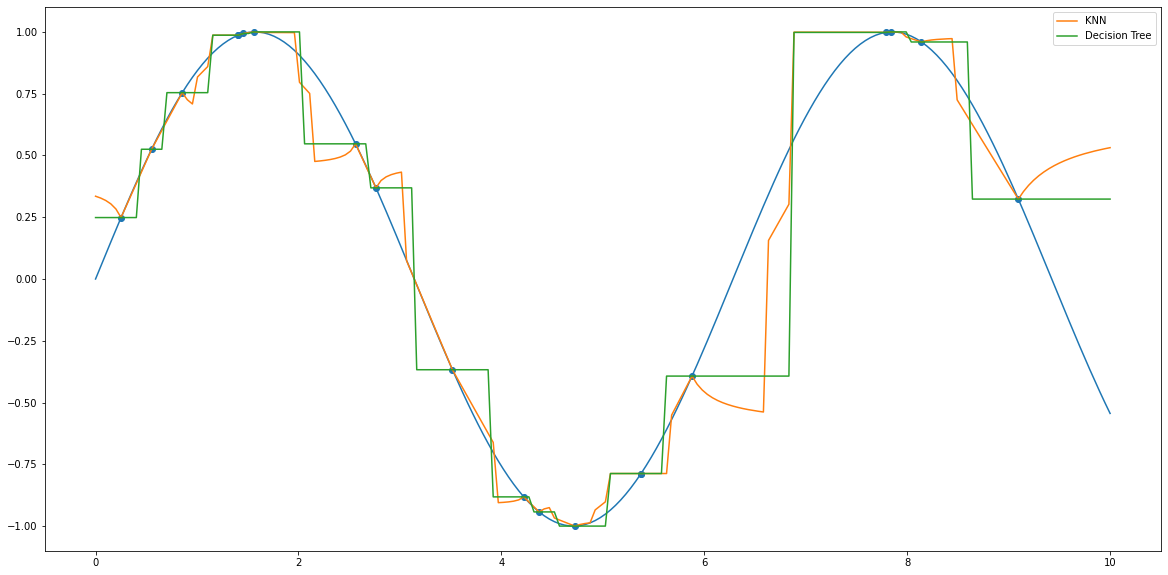

In [19]:
Yknn_from_loaded = knn.predict(X)
Ydt_from_loaded = dt.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(Xtrain, Ytrain) # show the training points
plt.plot(X, Y) # show the original data
plt.plot(X, Yknn_from_loaded, label='KNN')
plt.plot(X, Ydt_from_loaded, label='Decision Tree')
plt.legend();